# Ensembles and Unsupervised Learning

Poll: [https://pollev.com/bgriebel](https://pollev.com/bgriebel)

In [1]:
import io
import requests

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_digits, make_moons
from sklearn.cluster import DBSCAN, AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score
from sklearn.inspection import DecisionBoundaryDisplay
import seaborn as sns

!pip install umap-learn
import umap

2023-11-17 20:57:29.533813: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Decision Trees

Decision trees are like playing 20 questions with your data, you ask a series of yes no questions to seperate out your data into groups that only contain one class.   

**Predicting**:   
1. Start at the "root" of the tree
2. Ask a question about the data based on one of the features (is x1<0.4 for example)
3. Follow the path corresponding to the answer
4. Repeat steps 2 and 3 until you reach a "leaf", a node telling you the predicted class  

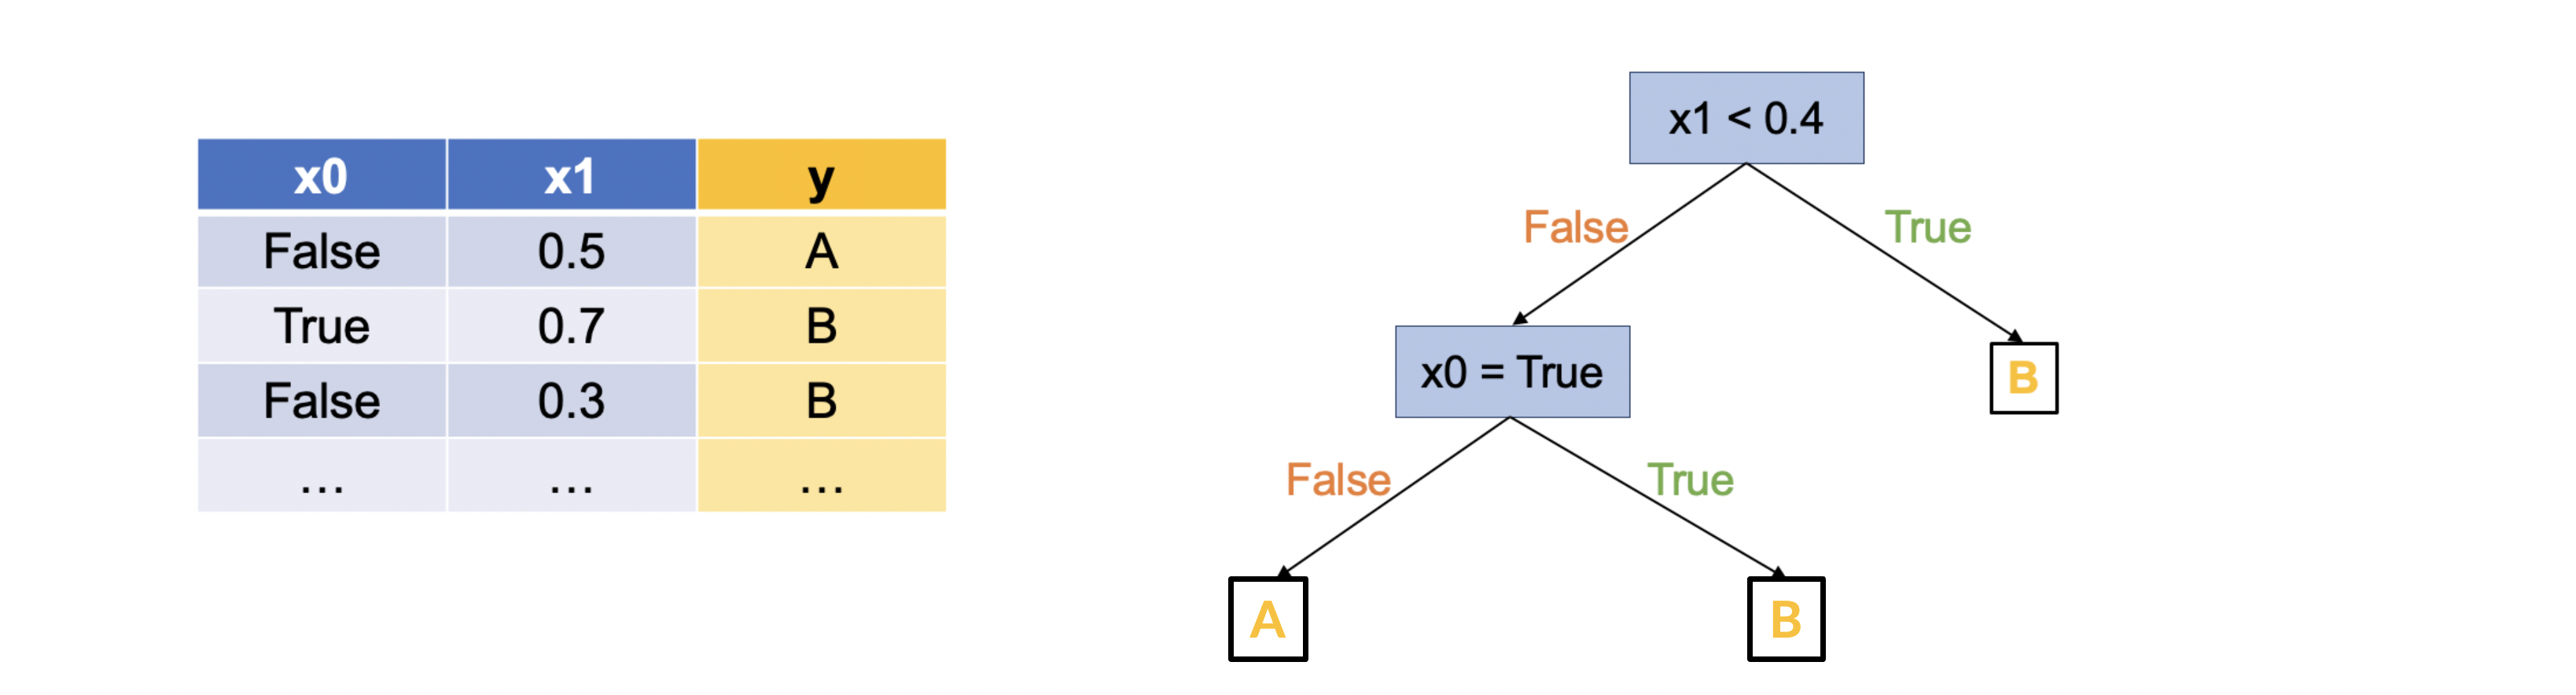

**Construction**: 
In order to build a decision tree, you start with all your data grouped together, and then find which feature splits the data best 
1. Start with all data in a single group 
2. Determine for each feature the best split that can be achieved based on the specific splitting criteria being used
3. Pick the best feature, and split the data at the best split based on the splitting criteria (see below for examples of splitting criteria)
4. Repeat step 2 and 3 along each path until you reach a stopping criteria (either all nodes are "pure", containing only one class, or you reach the maximum depth of the tree, a hyperparameter)

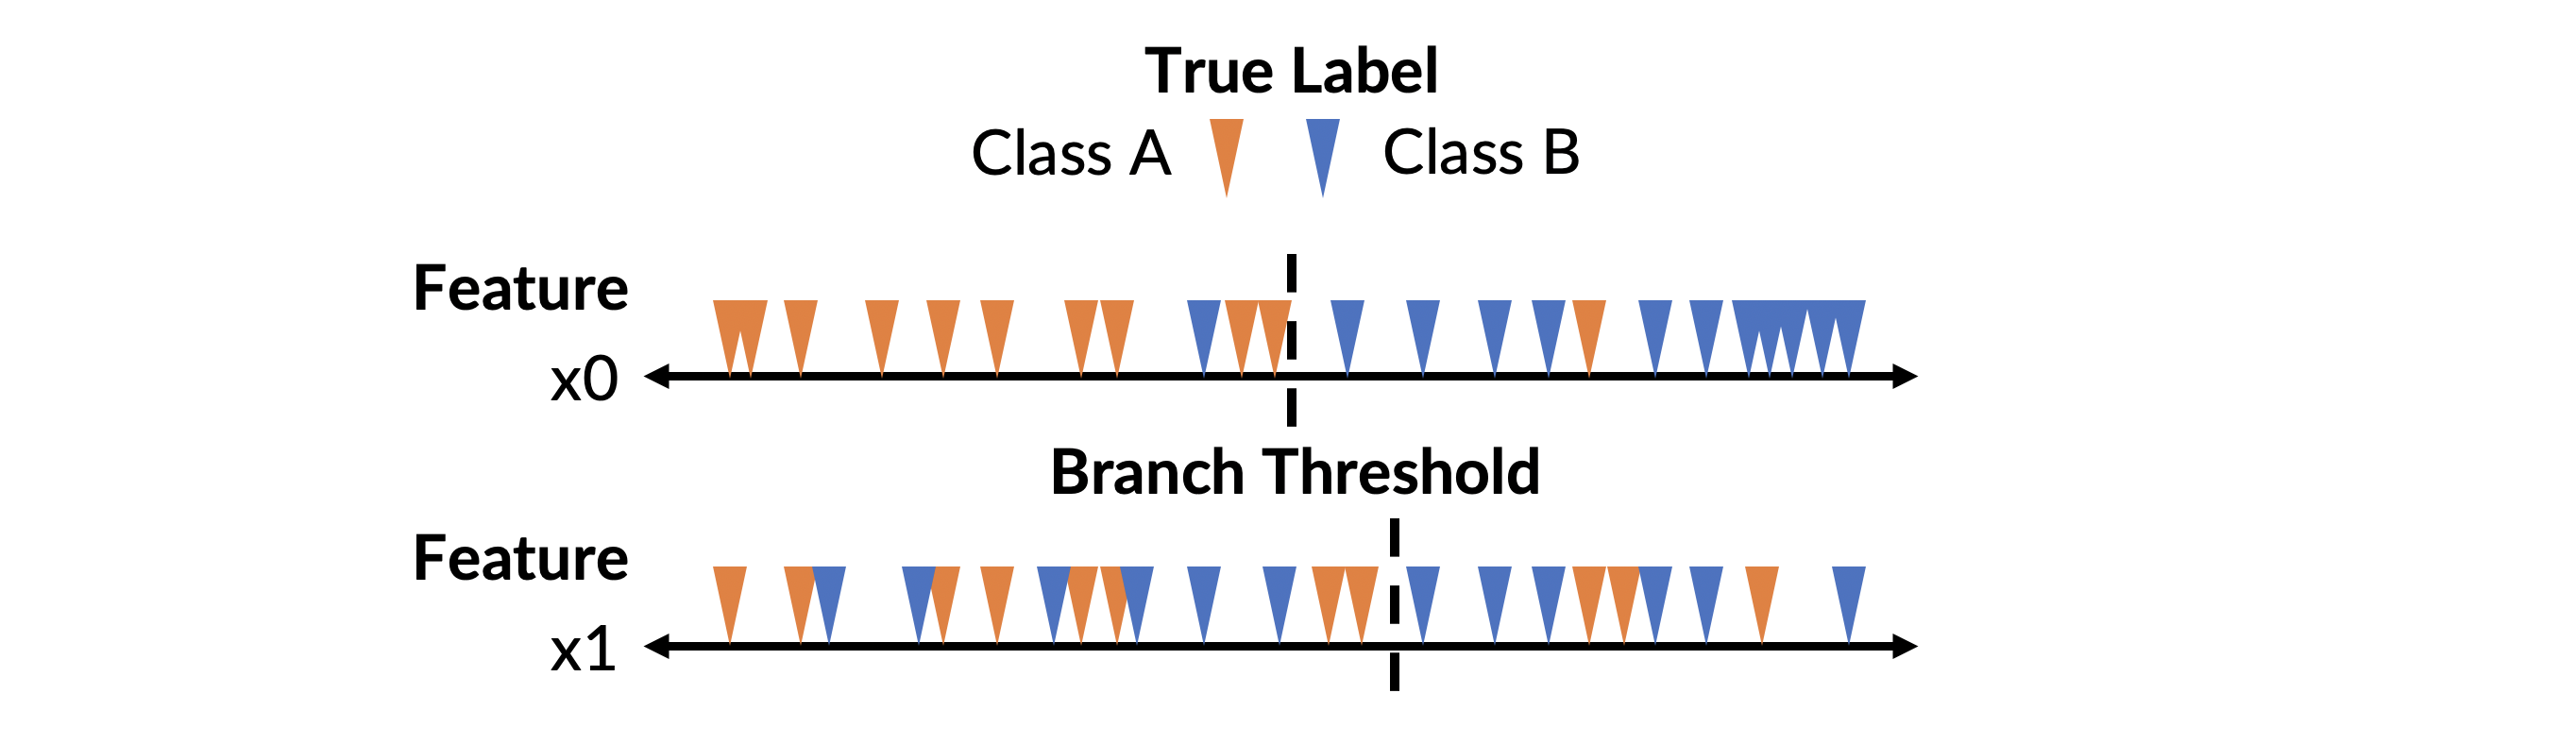

**Splitting Criteria**:  
The goal is to split the data so that you sepearate the classes as well as possible, but how do you measure how good of a split you have? Here are some common metrics that are used:  
- Gini Index: Developed as a measure of statistical dispersion intended to represent income inequality. A value of 0 represents perfect equality, a value of 1 reflects maximal inequality. Since we want to split our data such that the groups are as unequal (in terms of labels) as possible, we want to find the feature and split which result in a Gini index as close to 1 as possible. It is calculated as $$Gini\; Index = \sum_ip_i(1-p_i)$$  
- Information Gain: Measures the decrease in entropy (disorder, and in the information theory sense not really the thermodynamic sense). The entropy of the node following a split is calculated as the weighted average of the entropy of the children, and the information gain is the difference in entropy before and after the split. The entropy is calculated like this:
$$Entropy=-\sum_ip_ilog_2(p_i)$$ (other log bases can be used)
- Information Gain Ratio: Information gain is sensitive towards features with a large number of values (see [here](https://thesai.org/Publications/ViewPaper?Volume=4&Issue=2&Code=SpecialIssue&SerialNo=3) for a comapritive study of decision tree algorithms and [here](https://scientistcafe.com/ids/splitting-criteria#ref-HSSINA2014) for an example where the split is biased by the number of possible values) because by splitting into more groups, you gain more information. Due to this limitation, information gain ratio is sometimes used to avoid overfitting in cases where you are doing more than binary splits. It takes into account the split information, so that is is not as sensitive to features with many possible (categorical) values. These values have the following formulas:
$$Gain\; Ratio = \frac{Information\; Gain}{Split\; Information}$$
$$Split\; Information = -\sum_{c=1}^Cp_clog(p_c)$$
Where C is the number of categories, and $p_c$ is the proportion of data in category $c$. 

## Ensemble Methods

Frequently in machine learning, we try an select the best model for a given task like classification. We take a bunch of models (with different parameters, or different algorithms) and score them, then pick the best method and call it our model. But what if we could instead use all of these different models to arrive at a better solution?

There is a theorem called Condorcet's jury theorem, which states that under certain assumptions (namely that each "juror" is more likely to be right than wrong, and that a decision is reached by simple majority voting), that a larger group of individuals will be more likely to arrive at a correct   
  
Different models can capture different aspects of the data, and they also have different weaknesses. By combining the different parts captured by a bunch of models, we can create one super model, which is better than any single model.  
  
One of the biggest disadvantages of ensemble learners is computational cost. During training you have to train a bunch of models which takes longer than training a single model. Further, when predicting with the models, you are also having to predict with all the models. 

<img src="https://miro.medium.com/v2/resize:fit:720/format:webp/1*Naj64WlDU1L9X3uNBCTf6A.png" alt="Ensemble Learning" width="500">


from [https://towardsdatascience.com/what-are-ensemble-methods-in-machine-learning-cac1d17ed349](https://towardsdatascience.com/what-are-ensemble-methods-in-machine-learning-cac1d17ed349)

## Bagging

Bagging uses bootstrapping to create an ensemble of learners, each trained on a different set of data created by sampling (with replacement) the original data. Since each tree will be trained on different data, they will be slightly different, and the combination may be better than the individual models. 

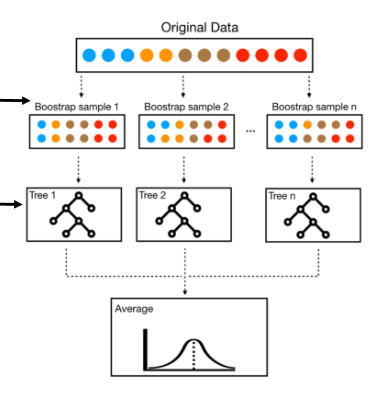

## Random Forest

Bagging has a problem with just creating a bunch of trees that are very simmilar to each other. Each tree looks at the same features, with the same hyperparameters, the only difference is the data it is trained on. While this will change the trees a little bit, they tend to be pretty simmilar, not really taking advatange of the idea of an ensemble of different learners.   

Random forest models, in addition to sampling the data, also (at each split) choose a random subset of the features to choose a candidate split for. This means that the different trees were not only trained on different data, but also were trained using different subsets of the features.   

This additional randomness reduces the problems with overfitting that decision trees can have.   
  
  
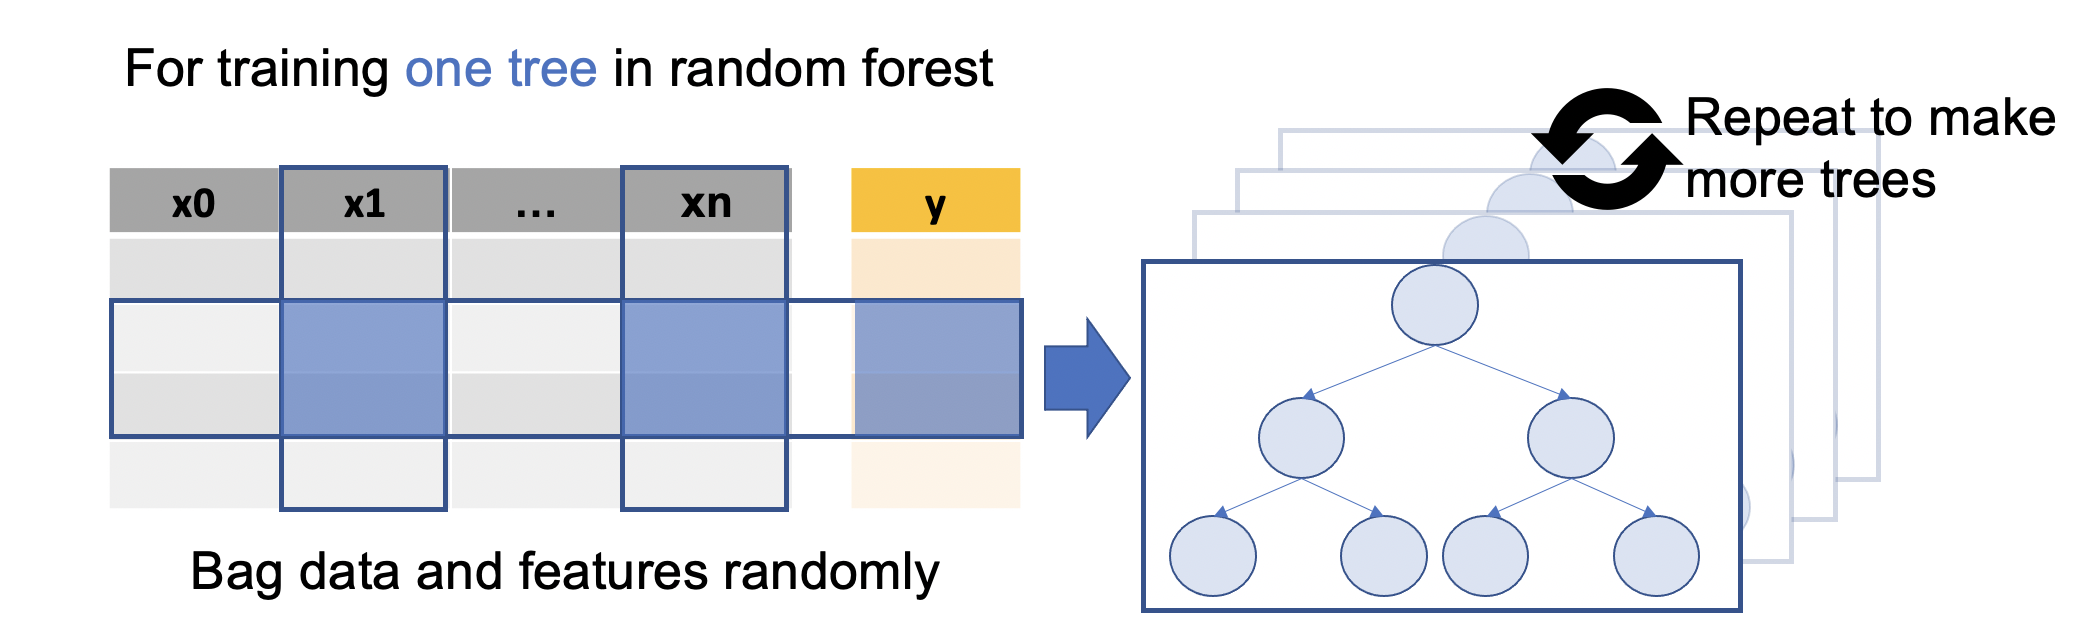

## Boosting

### Adaboost

When you're studying for a test, you don't just want to focus on the easy problems, since that will lead you to really struggle with the challenging concepts, instead you want to focus on the harder problems so that you improve. This is the idea behind Adaboost, it starts with a "weak" model, and the iteratively improves it by forcing it to learn the harder examples better.   
  
Adaboost creates a distribution of weights for each example based on how "hard" they are. All the weights start equal, and then for misclassified examples the weights are increased. The "weak" learner is then retrained with these new weights for the training examples, so that it keeps improving its ability to classify the harder cases.   

So you create an ensemble of learners, like in random forest, but each time you train a new learner, you take into account the errors of previously trained learners to improve the training. 

**Procedure**:
1. Start with a "weak" learner, essentially any machine learning algorithm (decision trees are very common for this)
2. Train the learner on the training data
3. Update the weights for each training example (based on which are misclassified by the ensemble of previous learners)
4. Train a new learner based on the updated weights
5. Update the weights based on the errors of the ensemble of previous learners
6. Repeat steps 4 and 5 till a stopping criteria is reached (convergence, or max number of learners)
  
  
**Weights**:  
- The weak learner can take into account the weights (such as a decision tree where the split criteria is weighted so that splitting the hard examples correctly is selected for) during training
- The weak learner can be trained on a bootstrapped dataset where the hard examples are sampled more than the easy examples

[**More Detailed Explanation of Adaboost**](https://cseweb.ucsd.edu/~yfreund/papers/IntroToBoosting.pdf)

### XGboost

Simmilar to Adaboost XGboost takes into account the previous errors of the model, but in this case it trains subsequent models to predict the error in previous regression models, and then adds this model to the previous models to correct for the error. 

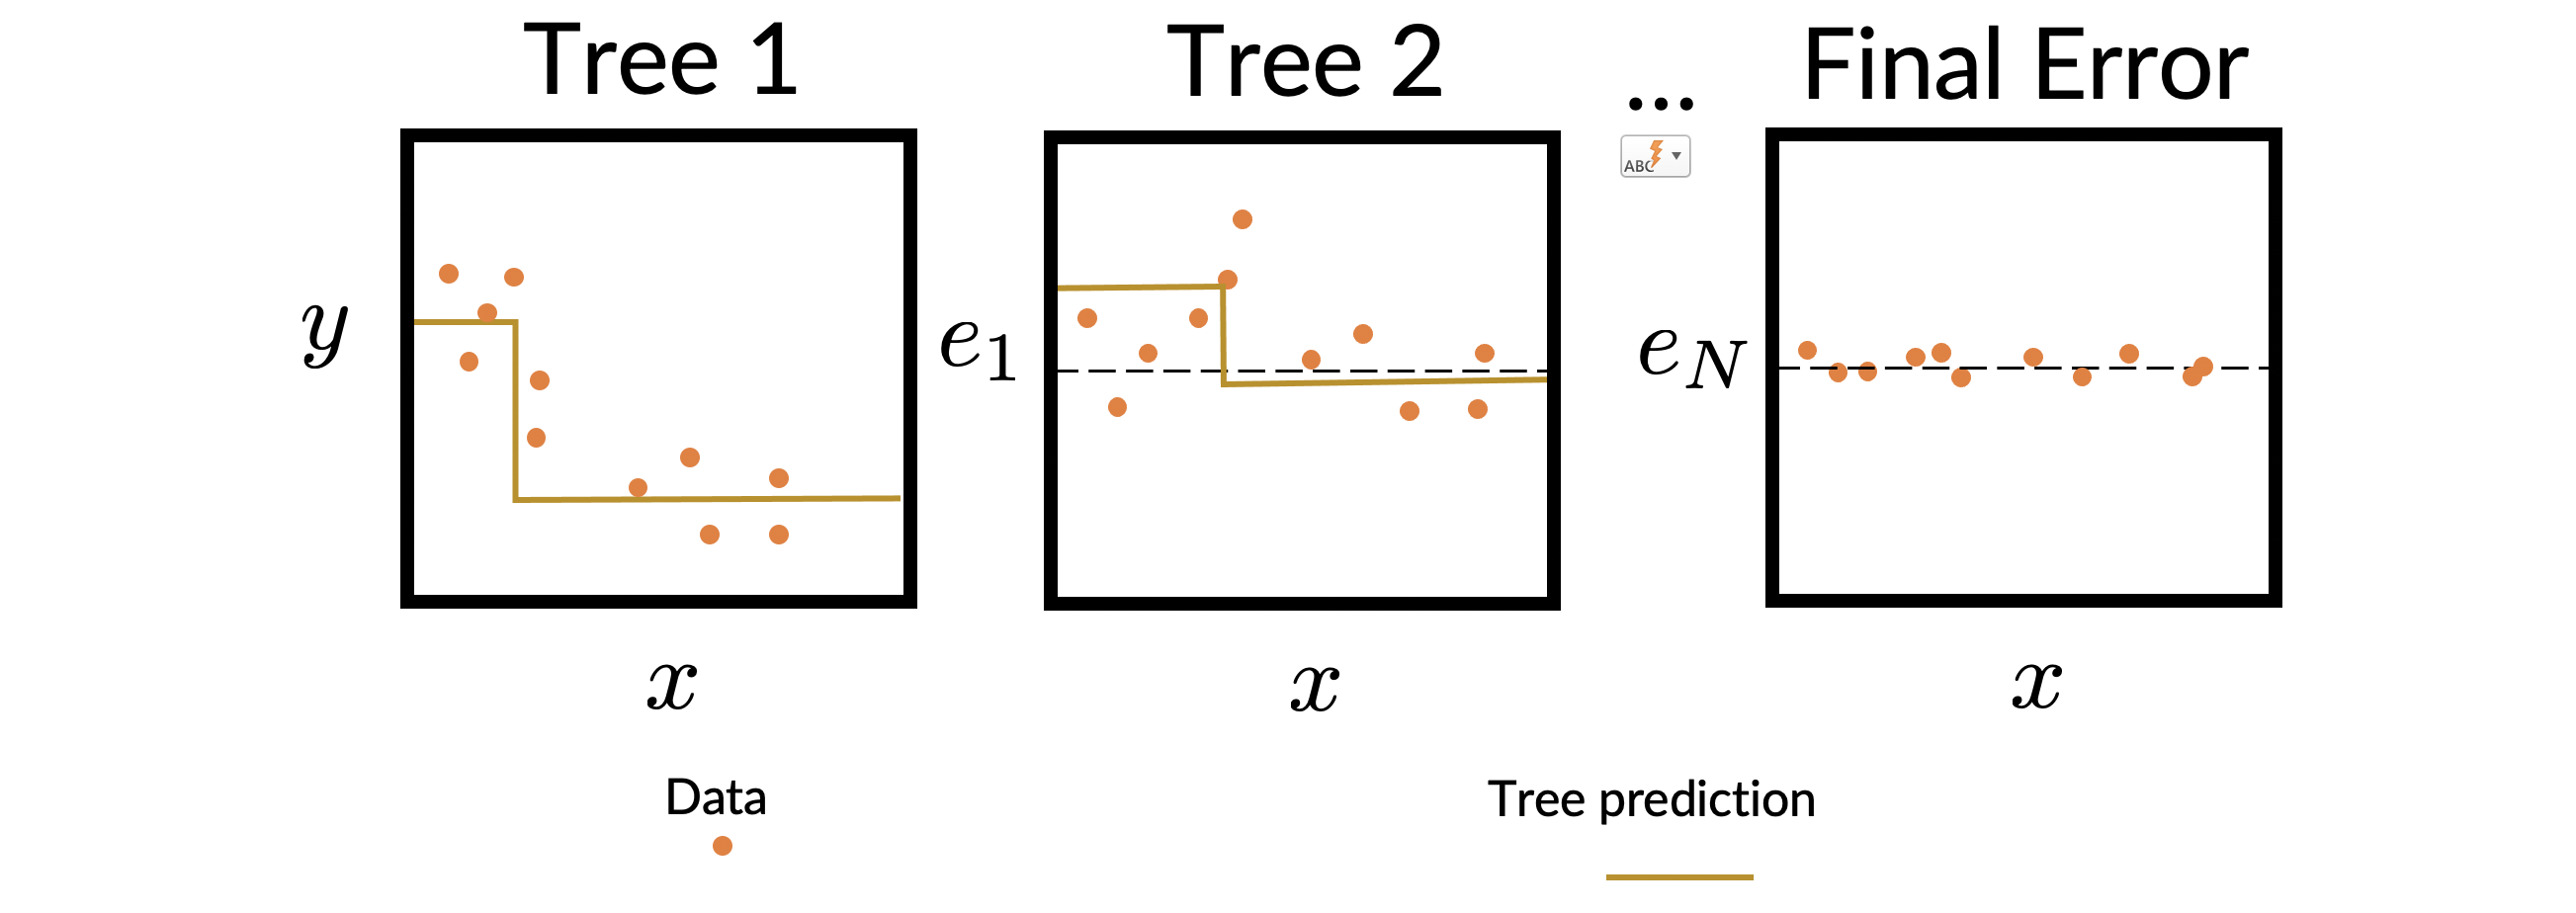

## Meta-estimators

Because the above ensemble methods are based on a base estimator (which can be chosen), they are called meta-estimators. To perform hyperparameter optimization on the underlying estimator as well as the meta-estimator, there is a special syntax in scikit-learn. As an example, lets say we are creating a GridSearchCV to optimize the hyperparameters of an adaboost meta-estimator, and we want to adjust the max-depth of the underlying DecisionTree classifier:
```
ada_classifier = sklearn.ensemble.AdaBoostClassifier(estimator = DecisionTree())
parameter_grid = {
    'n_estimators':[2,5,15,20,50,100] # Hyperparameter of the Adaboost classifier
    'estimator__max_depth`: [2,5,7,10,15,20] # Hyperparameter of the DecisionTree classifier
}
grid_search = GridSearchCV(ada_classifier, parameter_grid) # Create the GridSearchCV object
```
Notice how for hyperparameters for the underlying estimator, they need to be prefixed by `estimator__` (with two underscores). 

## Unsupervised Machine Learning

Sometimes, you don't have access to labeled data, but you still want to explore the data, and potentially discover new patterns. This is where we want to use unsupervised machine learning.  

Let's explore a new dataset:
MNIST is a set of labelled handwritten digits (using this for the dimensionality reduction since the labels can help show groupings, we will use unlabelled data later). 

(1797, 64)


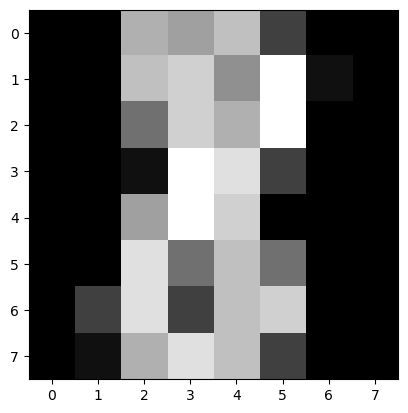

In [29]:
digits = load_digits()
digit_data = digits["data"]
digit_target = digits["target"]
print(digit_data.shape)
im1 = digit_data[40,:].copy()
im1 = im1.reshape(8,8)
plt.imshow(im1, cmap="gray")

How do we visualize all these different dimensions? We can use dimensionality reduction!

In [3]:
# Start by standardizing the data
scaler = StandardScaler()
digit_data = scaler.fit_transform(digit_data)

#### PCA

**Principle Component Analysis**:  
Projects the data onto a lower dimensional space, where each orthogonal component explains the highest amount of variance it can. 

In [4]:
# Fit PCA
pca = PCA(n_components=2)
components_pca = pca.fit_transform(digit_data)

<Axes: xlabel='Component 1', ylabel='Component 2'>

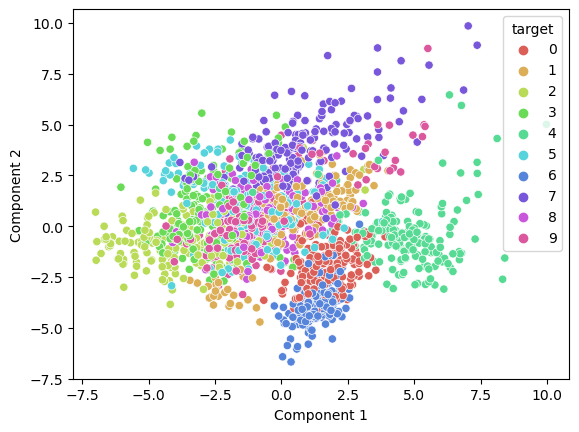

In [5]:
fig, ax = plt.subplots()
components_pca_df = pd.DataFrame(data=components_pca, columns = ["Component 1", "Component 2"])
components_pca_df["target"] = digit_target
sns.scatterplot(components_pca_df, x="Component 1", y="Component 2", hue="target", ax=ax,
               palette=sns.color_palette("hls", 10))

#### Note
Below I quickly show examples of using some other dimensionality reduction techniques (specifically t-SNE and UMAP). Feel free to skip this part if not interested in these. 

#### TSNE

**t-distributed stochastic neighboor embedding**: Tool for visualizing high dimensional data. From sklearn "It converts similarities between data points to joint probabilities and tries to minimize the Kullback-Leibler divergence between the joint probabilities of the low-dimensional embedding and the high-dimensional data."  

Basically, it tries to embed the data in the lower dimensional space such that points that are closer in the higher dimensional space have a higher probability of being close in the lower dimensional space. 

[Here](https://lvdmaaten.github.io/publications/papers/JMLR_2008.pdf) is the original paper describing t-SNE

In [6]:
# Fit TSNE
tsne = TSNE(n_components=2, n_iter=300, perplexity=40)
components_tsne = tsne.fit_transform(digit_data)

<Axes: xlabel='Component 1', ylabel='Component 2'>

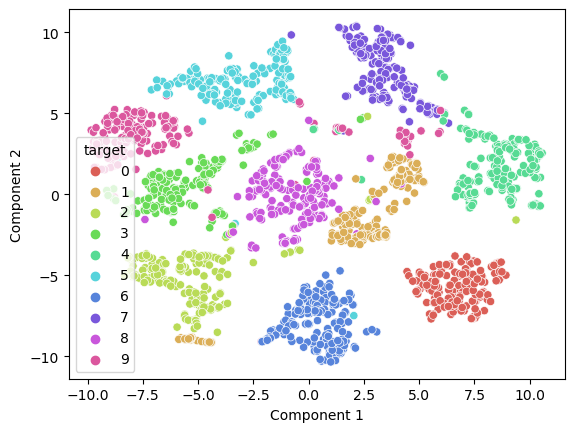

In [7]:
fig, ax = plt.subplots()
components_tsne_df = pd.DataFrame(data=components_tsne, columns = ["Component 1", "Component 2"])
components_tsne_df["target"] = digit_target
sns.scatterplot(components_tsne_df, x="Component 1", y="Component 2", hue="target", ax=ax,
               palette=sns.color_palette("hls", 10))

#### UMAP

UMAP is a dimensionality reduction algorithm which seeks to map the high dimensional data to a lower dimensional representation that preserves the topology of the data as much as possible. This is a method more commonly seen in analyzing RNA seq data, especially scRNA seq. 

Learn more [here](https://umap-learn.readthedocs.io/en/latest/how_umap_works.html)

In [8]:
# Transform the data using UMAP
umap_reducer = umap.UMAP()
components_umap = umap_reducer.fit_transform(digit_data)

<Axes: xlabel='Component 1', ylabel='Component 2'>

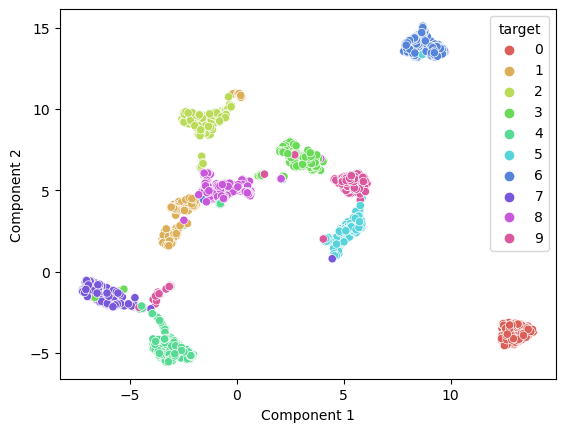

In [9]:
fig, ax = plt.subplots()
components_umap_df = pd.DataFrame(data=components_umap, columns = ["Component 1", "Component 2"])
components_umap_df["target"] = digit_target
sns.scatterplot(components_umap_df, x="Component 1", y="Component 2", hue="target", ax=ax,
               palette=sns.color_palette("hls", 10))

## Clustering

Let's look at a new dataset  

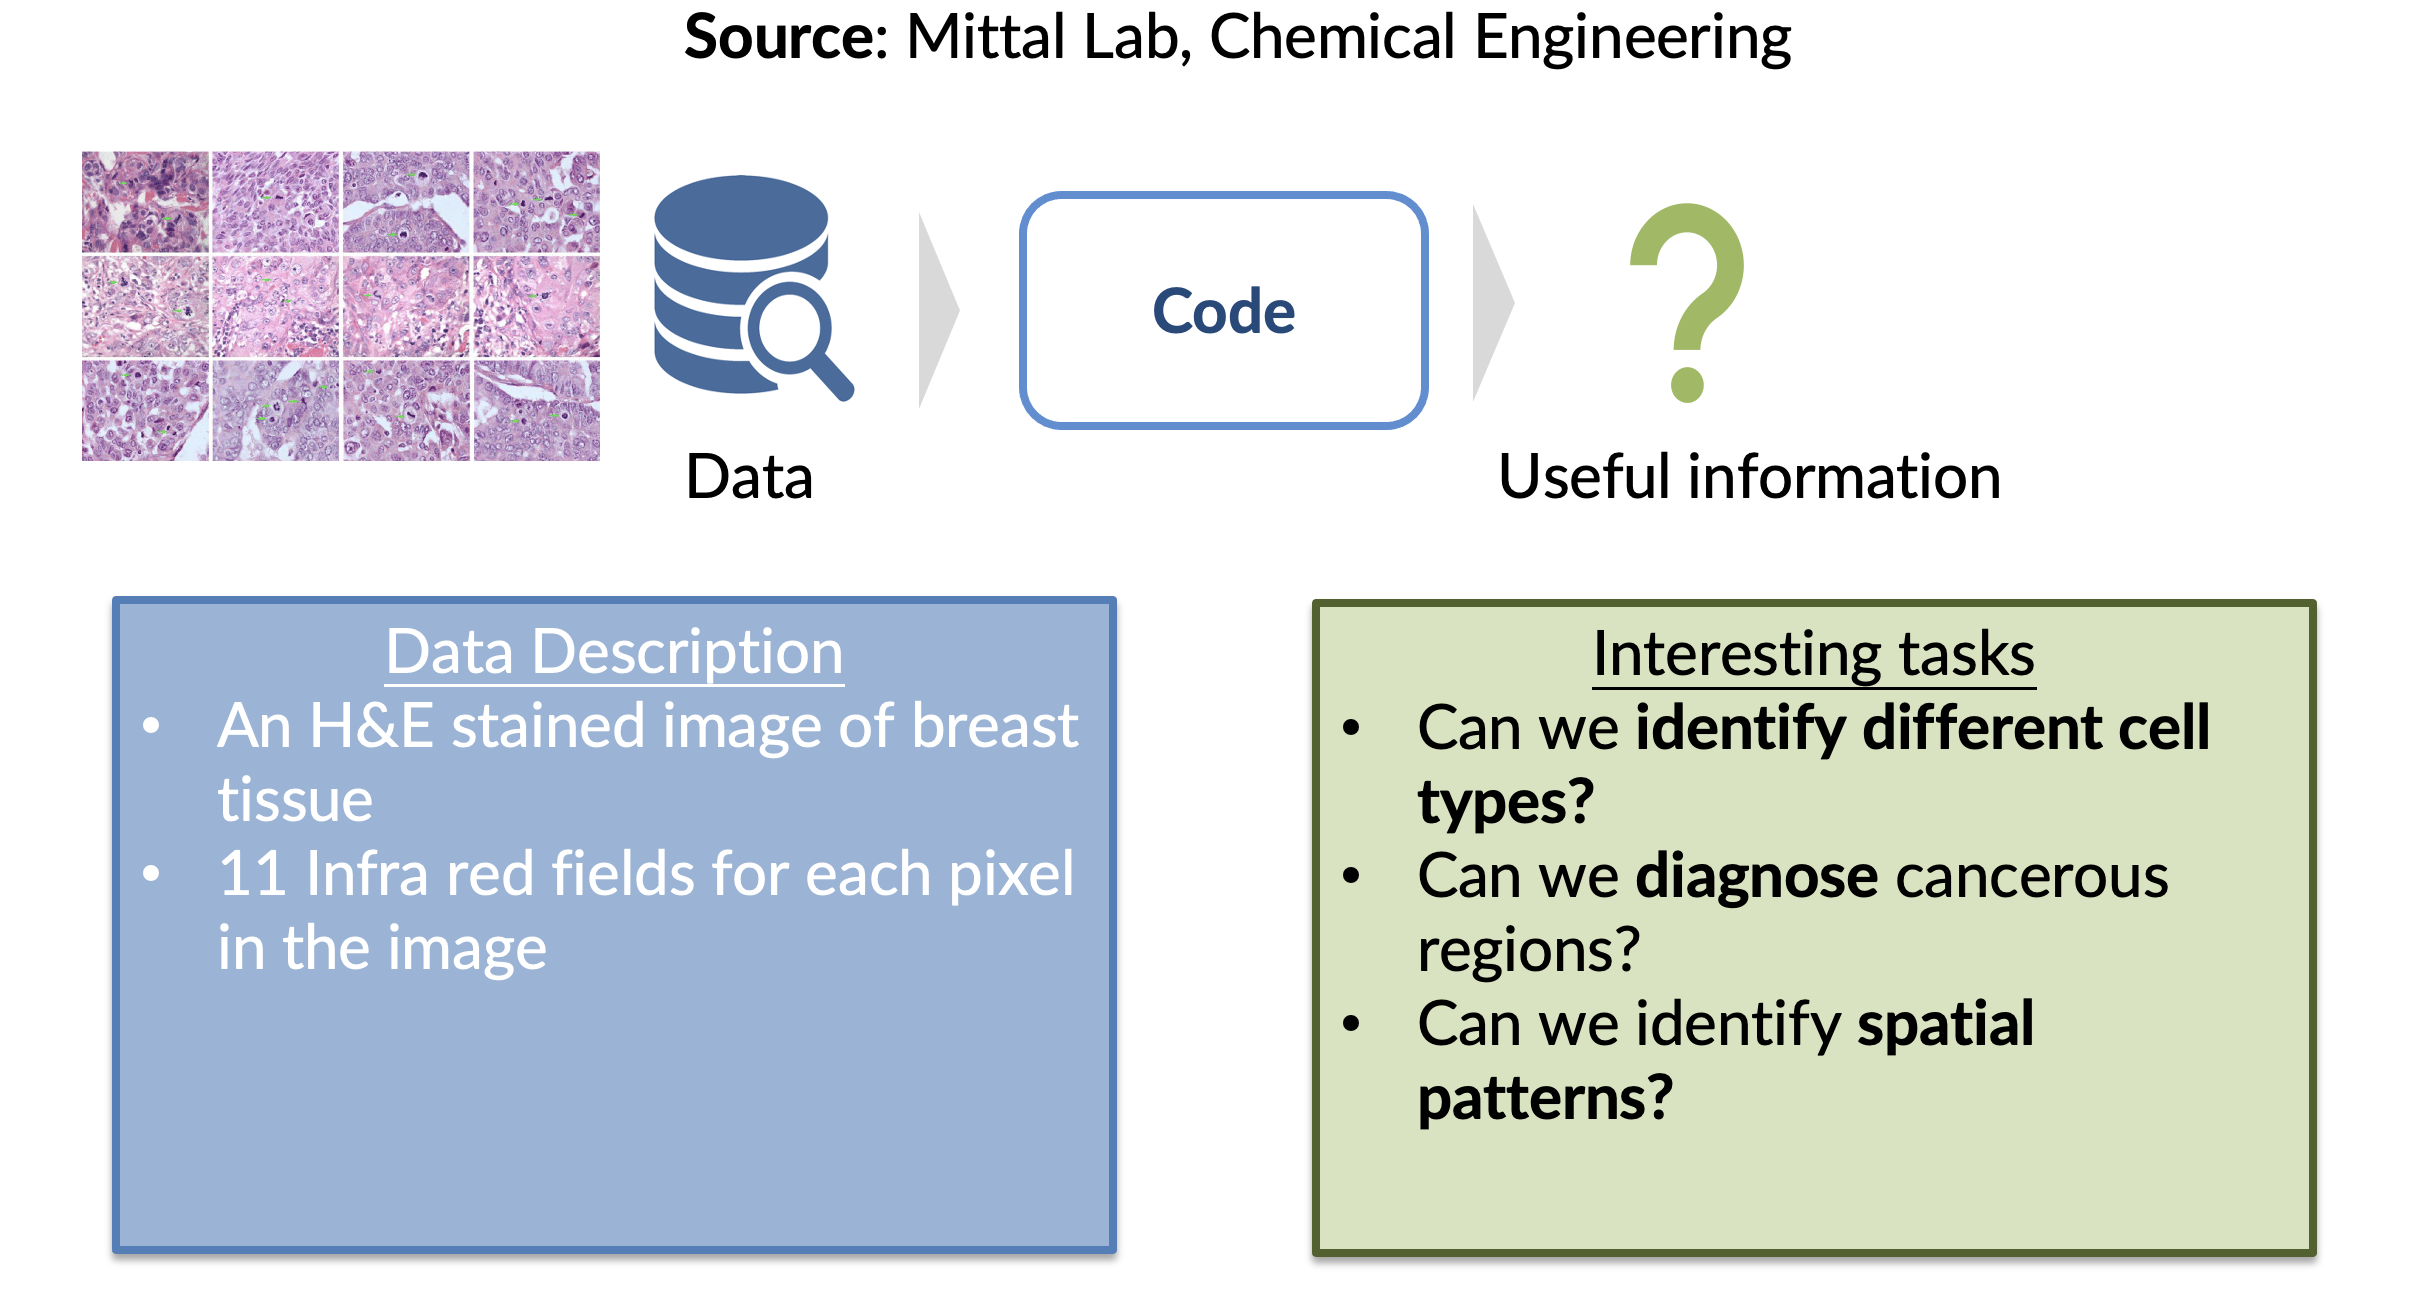

In [10]:
# Download and open the dataset
response = requests.get('https://github.com/UWDIRECT/UWDIRECT.github.io/raw/master/datasets/Mittal_BreastImage/breast_IR.npy')
response.raise_for_status()
X = np.load(io.BytesIO(response.content))

In [11]:
print(f"Shape of array: {X.shape}")

Shape of array: (1654, 1163, 11)


We can reshape this to treat each pixel as an observation

In [12]:
original_pixel_shape = X.shape[:2]
X = X.reshape(-1, X.shape[2])

<Axes: xlabel='PC0', ylabel='PC1'>

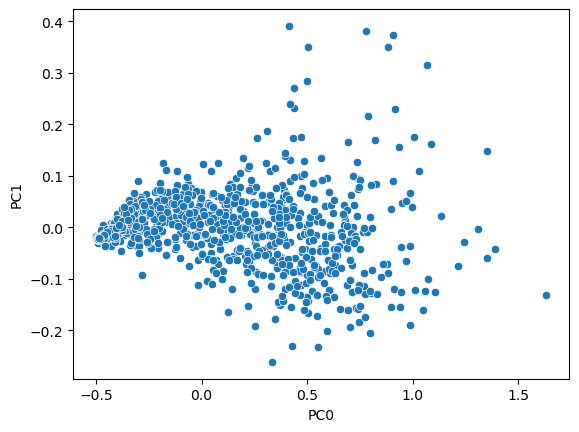

In [13]:
# Lets use PCA to visualize this high dimensional data
pca = PCA(n_components=2)
components_pca = pca.fit_transform(X)
fig, ax = plt.subplots()
components_df = pd.DataFrame(data=components_pca, columns = ['PC0', 'PC1'])
sns.scatterplot(components_df.sample(1000), x="PC0", y="PC1", ax=ax)

### KMeans Clustering

**KMeans Clustering** tries to find the centers of clusters which minimizes the distance of the data to the centeroid of its cluster.  

Let's try KMeans on the infrared data

In [14]:
kmeans = KMeans(n_clusters = 5, n_init=10) 
kmeans.fit(components_pca.astype("double")) # Fit on the reduced dimensional data so we can visualize it

KMeans(n_clusters=5, n_init=10)

In [15]:
centroids = kmeans.cluster_centers_
centroids.shape

(5, 2)

In [16]:
labels = kmeans.predict(components_pca.astype('double'))
pd.value_counts(labels)

1    754455
2    354013
4    343150
0    321394
3    150590
Name: count, dtype: int64

Now we can visualize this data in component space

In [17]:
kmeans.cluster_centers_

array([[ 0.49678704, -0.00170863],
       [-0.42534073, -0.00757502],
       [ 0.20135262,  0.0011607 ],
       [ 0.85283296, -0.01547873],
       [-0.10969034,  0.02251123]])

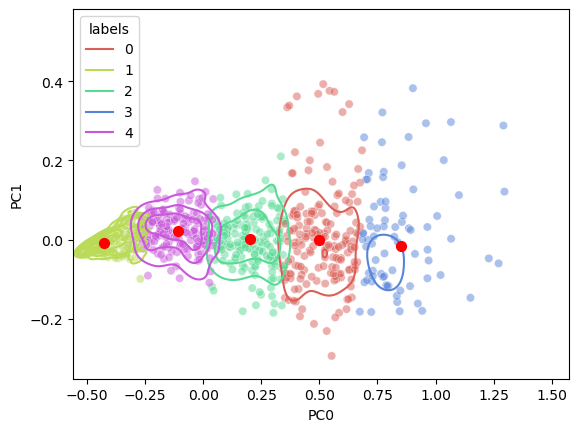

In [31]:
fig, ax = plt.subplots()
components_df = pd.DataFrame(data=components_pca, columns = ['PC0', 'PC1'])
components_df["labels"] = labels
sns.scatterplot(components_df.sample(1000), x="PC0", y="PC1", ax=ax, hue="labels",
               palette=sns.color_palette("hls", 5), alpha=0.5)
sns.kdeplot(components_df.sample(1000), x="PC0", y="PC1", ax=ax, hue="labels", 
            palette=sns.color_palette("hls", 5))
ax.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=50, c='r', zorder=2)

array([0, 1, 2, 3, 4], dtype=int32)

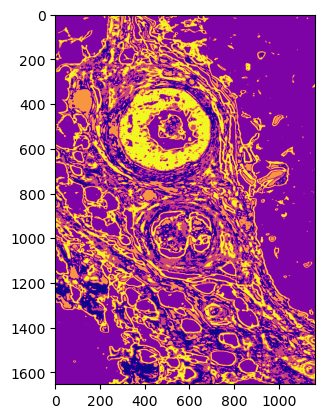

In [19]:
plt.imshow(labels.reshape(original_pixel_shape), cmap='plasma')
np.unique(labels)

Is this a good segmentation? How can we tell?
- Expert opinion 
- Scoring the clustering

**Inertia**: Sum of the squared distances between the instances and their closest centroids. Will always become smaller with more clusters (which is why you would need to use something like the elbow method to determine the right number of clusters).

**Silhouette Coefficient**: One of the most common method to score how good a clustering is, it is calculated as 
$$S=\frac{NCD-ICD}{max(ICD, NCD}$$
Where ICD is the intra cluster distance, the mean distance between a data point in a cluster to all other datapoints in that cluster, and NCD is the mean distance of the data point to the all data points in the nearest cluster that is not the one the point is assigned to.    

**Silhouette Score**: Mean of the silhouette coefficient for all data points. ranges between -1 (incorrect clustering) and +1 (highly dense clustering), scores around 0 indicate overlapping clusters

**Calinski-Harabasz Index**: Ratio of the sum of between-cluster dispersion and of within-cluster dispersion for all clusters (dispersion is the sum of the distances squared). This is much faster than Silhouette score to compute, since it only needs to calculate the distance between the points and the n centroids, rather than the distance between all points in a cluster, and all points and points in a neighboring cluster. (Higher scores are better)

**Davies_Bouldin Index**: The average 'simmilarity' between each cluster, and its most simmilar one. Where simmilarity is a measure that compares the distance between clusters and the size of the clusters. The simmilarity is a measure that trades off 
 - $s_i$: The average distance between each point of a cluster and its centroid
 - $dij$: THe distance between the centroids of i and j
 One choice for this metric (the one that sklearn uses) is $R_{ij}=\frac{s_i+s_j}{d_{ij}}$
 
 (0 is the best score).

*Note*: Most of these scores work better for convex clusters

### Heirarchical Clustering

**Heirarchical Clustering** clusters based on repeatedly fusing groups of points together. We start with n observations and some measure of the simmilarity between different points (commonly euclidean distance, but other metrics may be more appropriate depending on the situation).   
  
Using find the two most simmilar points, or groups of points, and merge them into a group. 

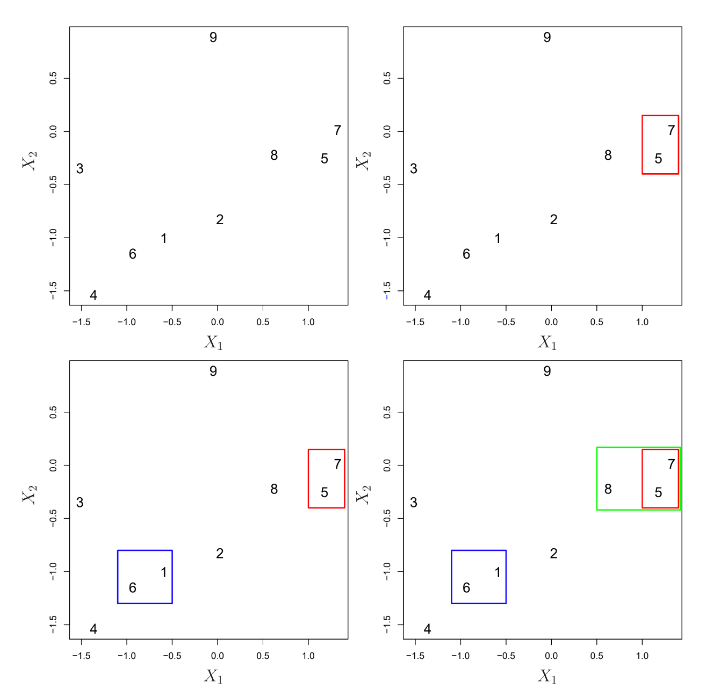

The result of this process can be visualized as a dendrogram, where each point is displayed along the x axis, and y represents the distance between points. Each vertical line from a data point is merged with group is is merging with at the height corresponding to the simmilarity between that point, and the group it is joining.   

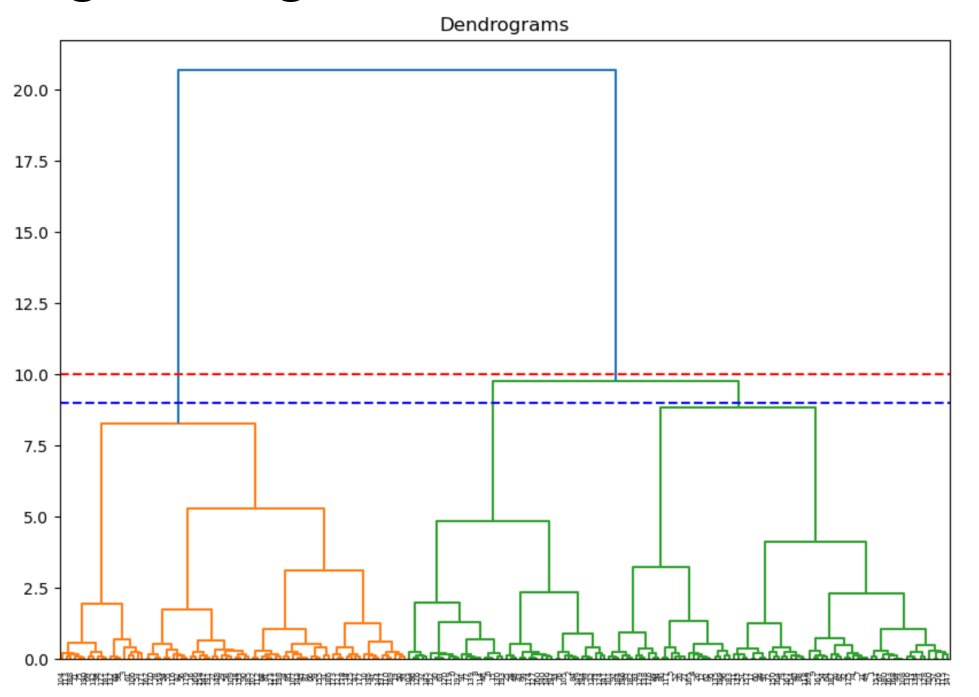

This type of clustering is commonly used for analysing gene expression assays, such as RNA seq. This can reveal groups of genes that are coregulated, and also give indication of the difference between groups of samples (can be useful for detecting batch effects). 

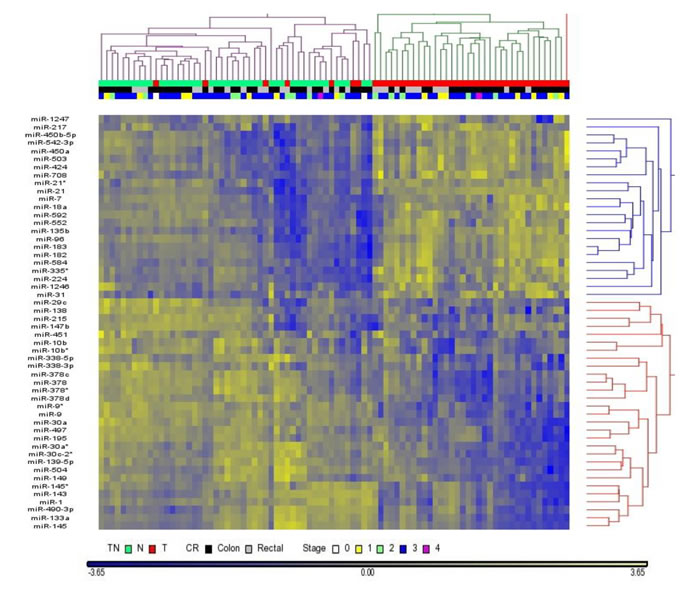  


from https://www.rna-seqblog.com/a-bias-reduction-small-rna-deep-sequencing-protocol-reveals-signature-mirnas/clustering/

### DBSCAN

**DBSCAN** is a clustering method that relies on density rather than finding the centers of groups (like KMeans). In addition to being able to cluster data, DBSCAN is also able to detect outliers, which are isolated datapoints far away from  dense groups of points.   

  
Being able to cluster based on density allows for capturing more complex shaped clusters in your data.  

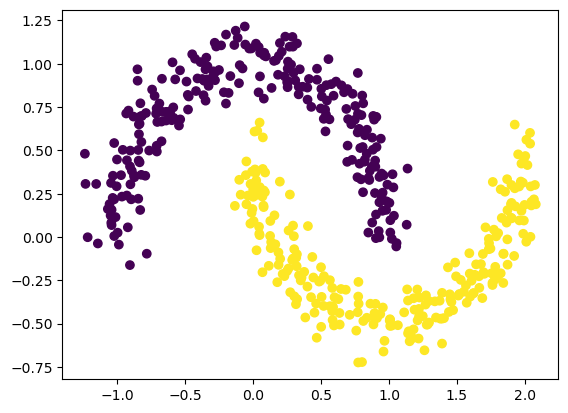

In [20]:
# Create the moons dataset
X,y = make_moons(n_samples=500, shuffle=True, noise=0.1, random_state=20)
fig, ax = plt.subplots()
ax.scatter(X[:,0], X[:,1], c=y)

**Procedure**: 
DBSCAN relies (mainly) on two hyperparameters, epsilon and min_samples
- epsilon: Maximum distance between two points for them to be considered in eachothers neighborhood
- min_samples: Number of points in a neighborhood for a point to be considered a core point
In order to determine which parts of the data are densely connected, DBSCAN 

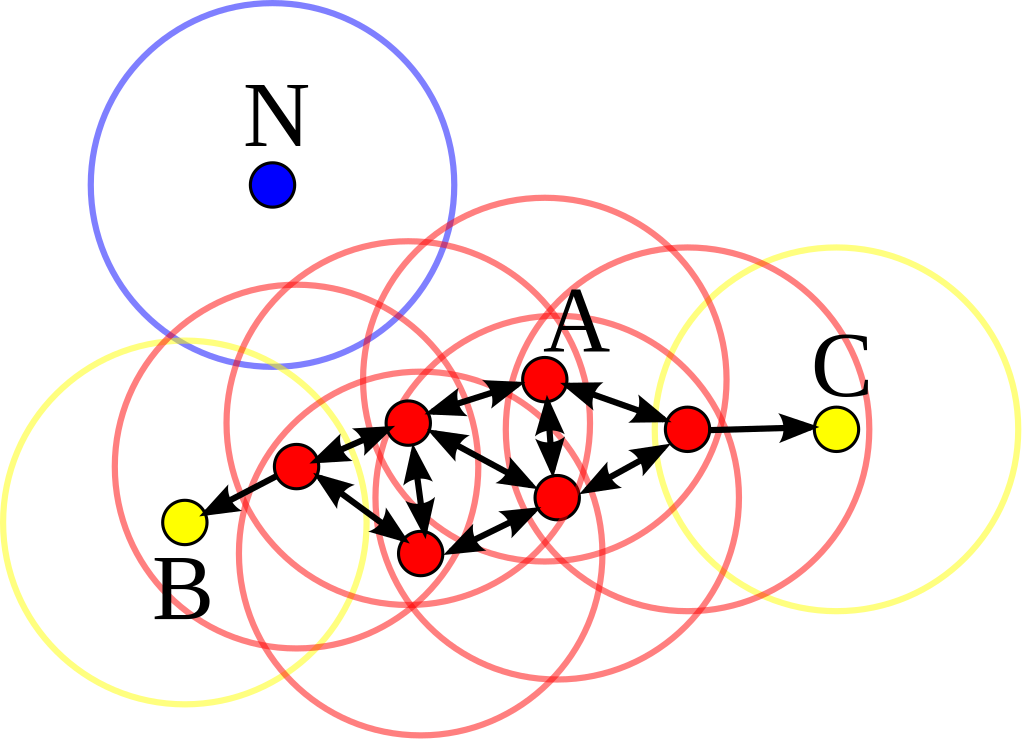

In [21]:
# We can use a grid search to try and find the best hyperparameters
best_parameters = {"eps":-1., "min_samples":-1} # Dict to store best parameters
best_silhouette = -1 # Variable to hold best silhouette score for finding max
for e in np.linspace(0.001, 0.3, 20): # Iterate through possible epsilon values
    for m in range(2,10): # Iterate through possible minimum number of samples
        clusterer = DBSCAN(eps=e, min_samples=m) # Create DBSCAN object
        clusters = clusterer.fit_predict(X) # Cluster with the DBSCAN object
        if len(np.unique(clusters))<2: # Silhouette score won't work with only 1 cluster
            continue
        score = silhouette_score(X,clusters) # Find the silhouette score
        if score>best_silhouette: # If the score is greater than current maximum, update best parameters
            best_silhouette = score
            best_parameters["eps"] = e
            best_parameters["min_samples"] = m
print(f"Best parameters are :{best_parameters}") 
print(f"Best silhouette score is: {best_silhouette}")

Best parameters are :{'eps': 0.17410526315789474, 'min_samples': 2}
Best silhouette score is: 0.33336829310176436


N_clusters: 2


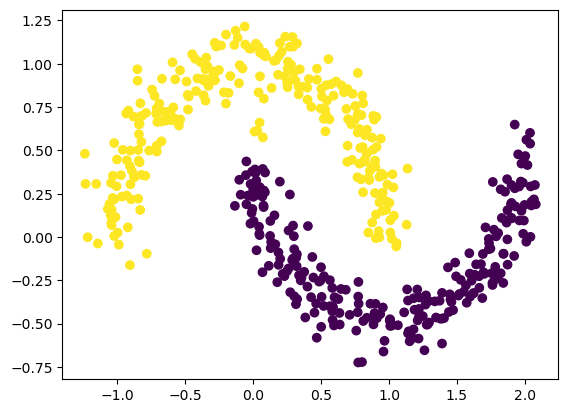

In [22]:
# Lets try clustering the make_moons data 
dbscan_cluster = DBSCAN(**best_parameters) # Use best parameters to cluster the data
clusters = dbscan_cluster.fit_predict(X) 
print(f"N_clusters: {len(np.unique(clusters))}")
fig, ax = plt.subplots()
ax.scatter(X[:,0],X[:,1], c=clusters)

## Excercises:

### Clustering

Below I create some data for clustering

In [23]:
# Create a dataset for clustering
from sklearn.datasets import make_blobs
X_cluster, y_cluster = make_blobs(n_samples=100, n_features=2, centers=5, random_state=42)

Create an inertia plot for clustering this data with KMeans for n_clusters between 1 and 10. What do you notice about the shape of the graph after n_clusters=5? 
 
*Hint*: KMeans has a inertia_ property

Create a plot of the silhouette score for clustering the data with AgglomerativeClustering (aka hierarchacal clustering) for n_clusters between 1 and 10. Does this have the same optimal number of clusters as KMeans?

Create a plot of the Calinski-Harabasz score (sklearn.metrics.calinski_harabasz_score) for clustering the data with DBSCAN, using min_samples=3, for epsilon between 0.1 and 1.5. 

### Image Segmentation

Upload an image, and repeat the class excercise of segmenting the image. Try using different clustering methods, and different hyperparameters for those clustering methods. 

*Note*: Some of the clustering methods (DBSCAN) can take a long time to run on large datasets (or even run out of memory depending on the size), if its taking a while try resizing the image so that it is smaller. 